In [1]:
import kagglehub

path=kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'resume-dataset' dataset.
Path to dataset files: /kaggle/input/resume-dataset


In [2]:
!pip install pdf2image
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 38 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.10 [186 kB]
Fetched 186 kB in 1s (284 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 126666 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.10_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.10) ...
Setting up poppler-utils (22.02.0-2ubuntu0.10) ...
Processing triggers for man-db (2.10.2-1) ...


In [3]:
from pdf2image import convert_from_path
import os

arr=[92069209, 91697974 , 91635250 , 91121135, 90867631 , 89413122 , 83816738 , 81761658, 79541391, 70089206 , 68460556 , 66832845 , 64017585, 57002858, 52618188]
output_dir = "resume_image"
os.makedirs(output_dir,exist_ok=True)

for i in arr:
  resume_id = str(i)
  resume_dir = os.path.join(output_dir, resume_id)
  os.makedirs(resume_dir, exist_ok=True)

  images = convert_from_path(f"/kaggle/input/resume-dataset/data/data/INFORMATION-TECHNOLOGY/{resume_id}.pdf")
  for j in range(len(images)):
    image_path = os.path.join(resume_dir, f'page{j+1}.jpg')
    images[j].save(image_path,'JPEG')

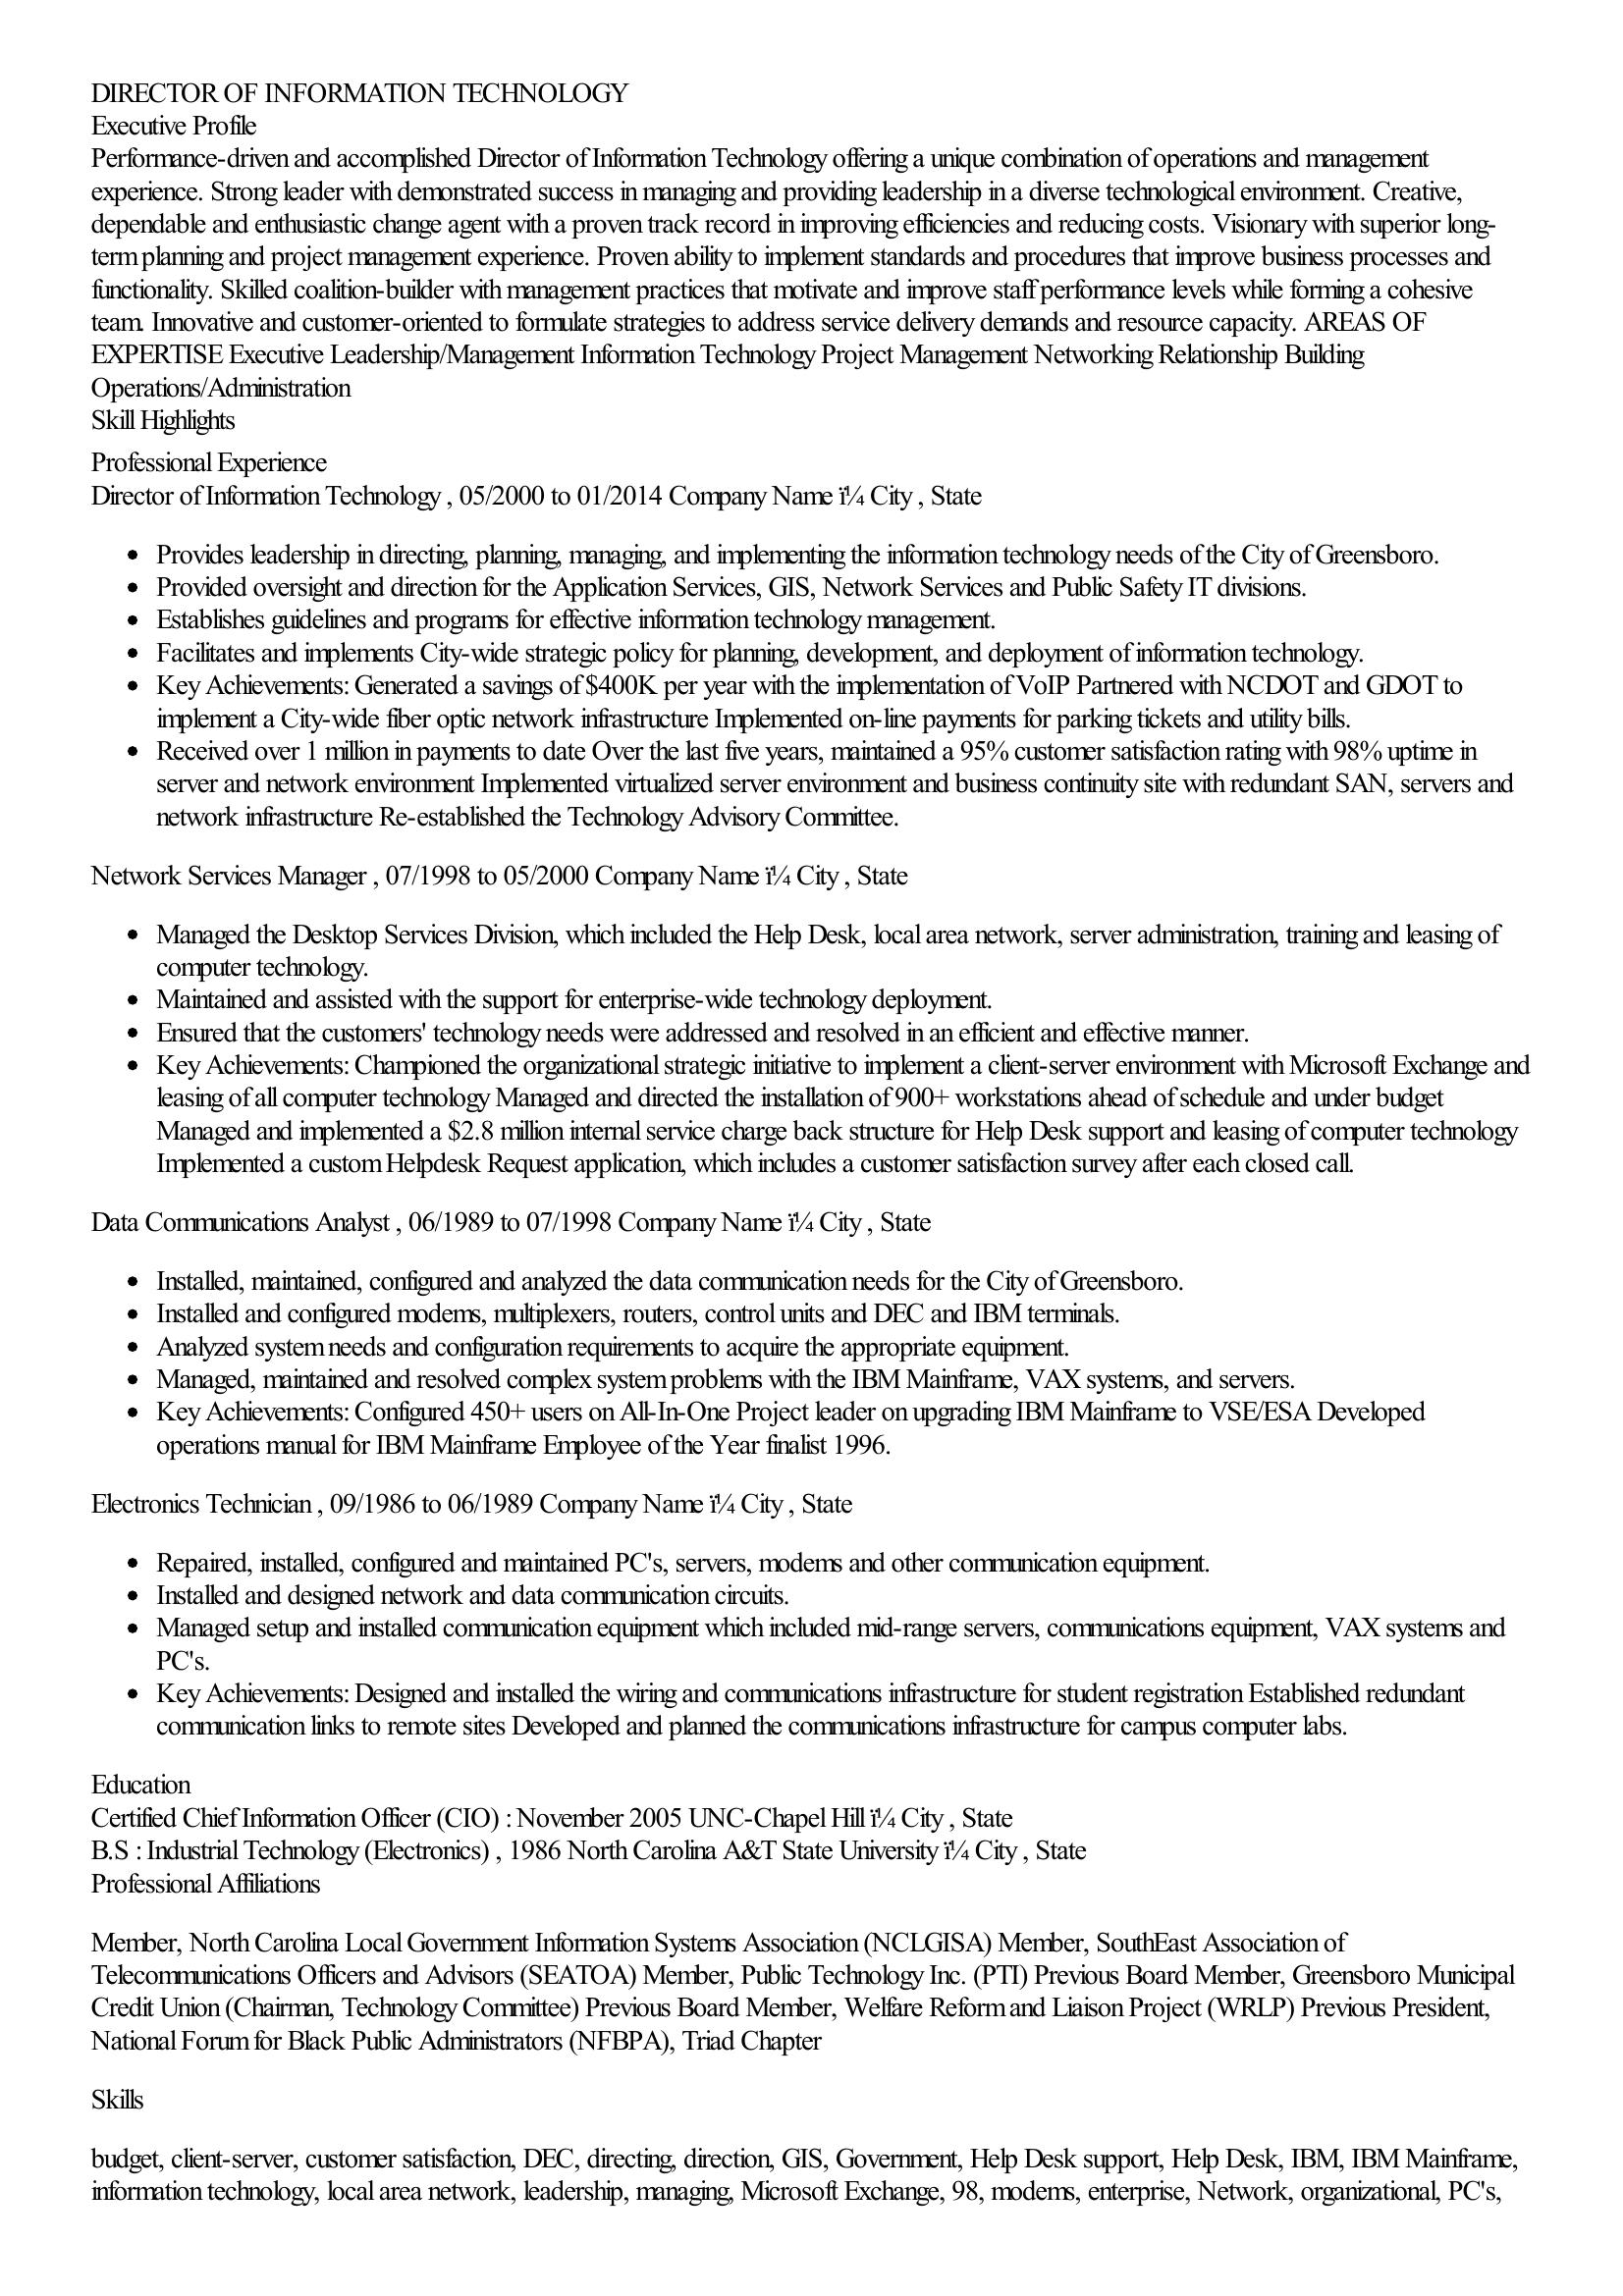

In [4]:
from IPython.display import display, Image

image_path = os.path.join("resume_image", "92069209", "page1.jpg")
display(Image(filename=image_path))

In [5]:
! pip install opencv-python matplotlib numpy

In [6]:
one_image=os.path.join("resume_image", "92069209", "page1.jpg")


In [8]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

In [9]:
import cv2
import matplotlib.pyplot as plt

def binarize_image(one_image):
  return cv2.adaptiveThreshold(
    one_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, # Invert the colors (text becomes white)
    11, # Block size
    4  # Constant C
  )

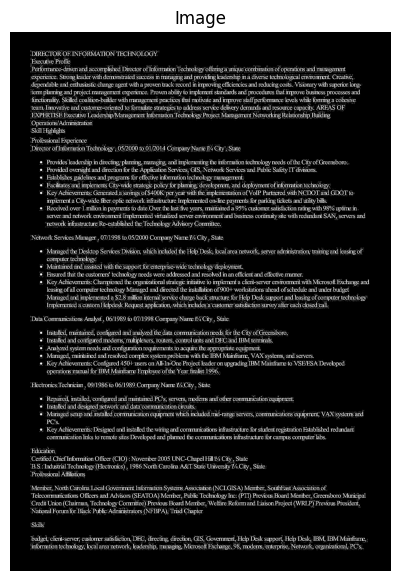

In [10]:
image=cv2.imread(one_image,cv2.IMREAD_GRAYSCALE)
binary=binarize_image(image)
display_image(binary)

In [11]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread(one_image,cv2.IMREAD_GRAYSCALE)



# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 9, -1], [0, -1, 0]])

# Sharpen the image
sharpened_image = cv2.filter2D(image, -1, kernel)

#Save the image
cv2.imwrite('sharpened_image.jpg', sharpened_image)


True

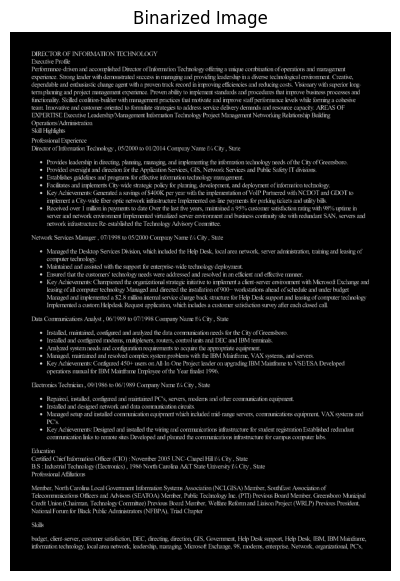

In [13]:
binarized_image = binarize_image(sharpened_image)
display_image(binarized_image, "Binarized Image")


In [14]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

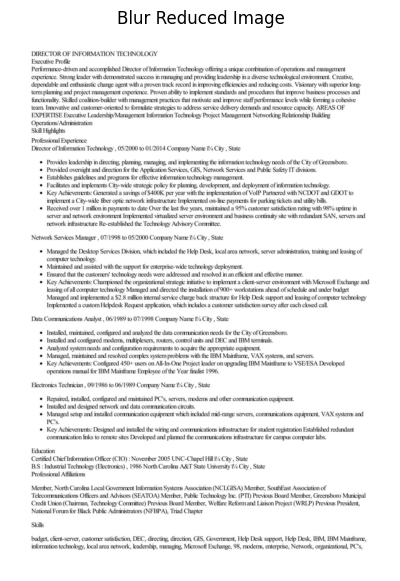

In [15]:
blur_reduced_image = reduce_noise(image)
display_image(blur_reduced_image, "Blur Reduced Image")

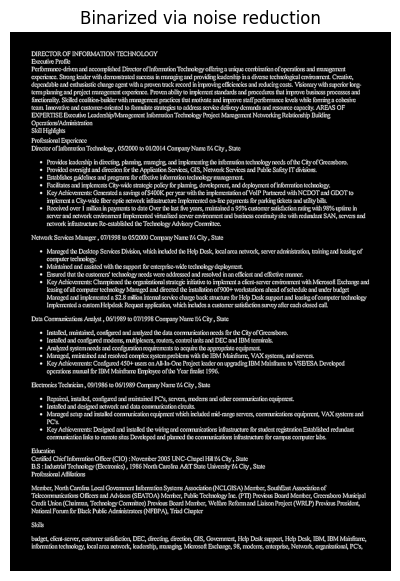

In [17]:
binarized_image = binarize_image(sharpened_image)
binarised_image=binarize_image(blur_reduced_image)
display_image(binarised_image,"Binarized via noise reduction")

In [18]:

!pip install pytesseract pillow

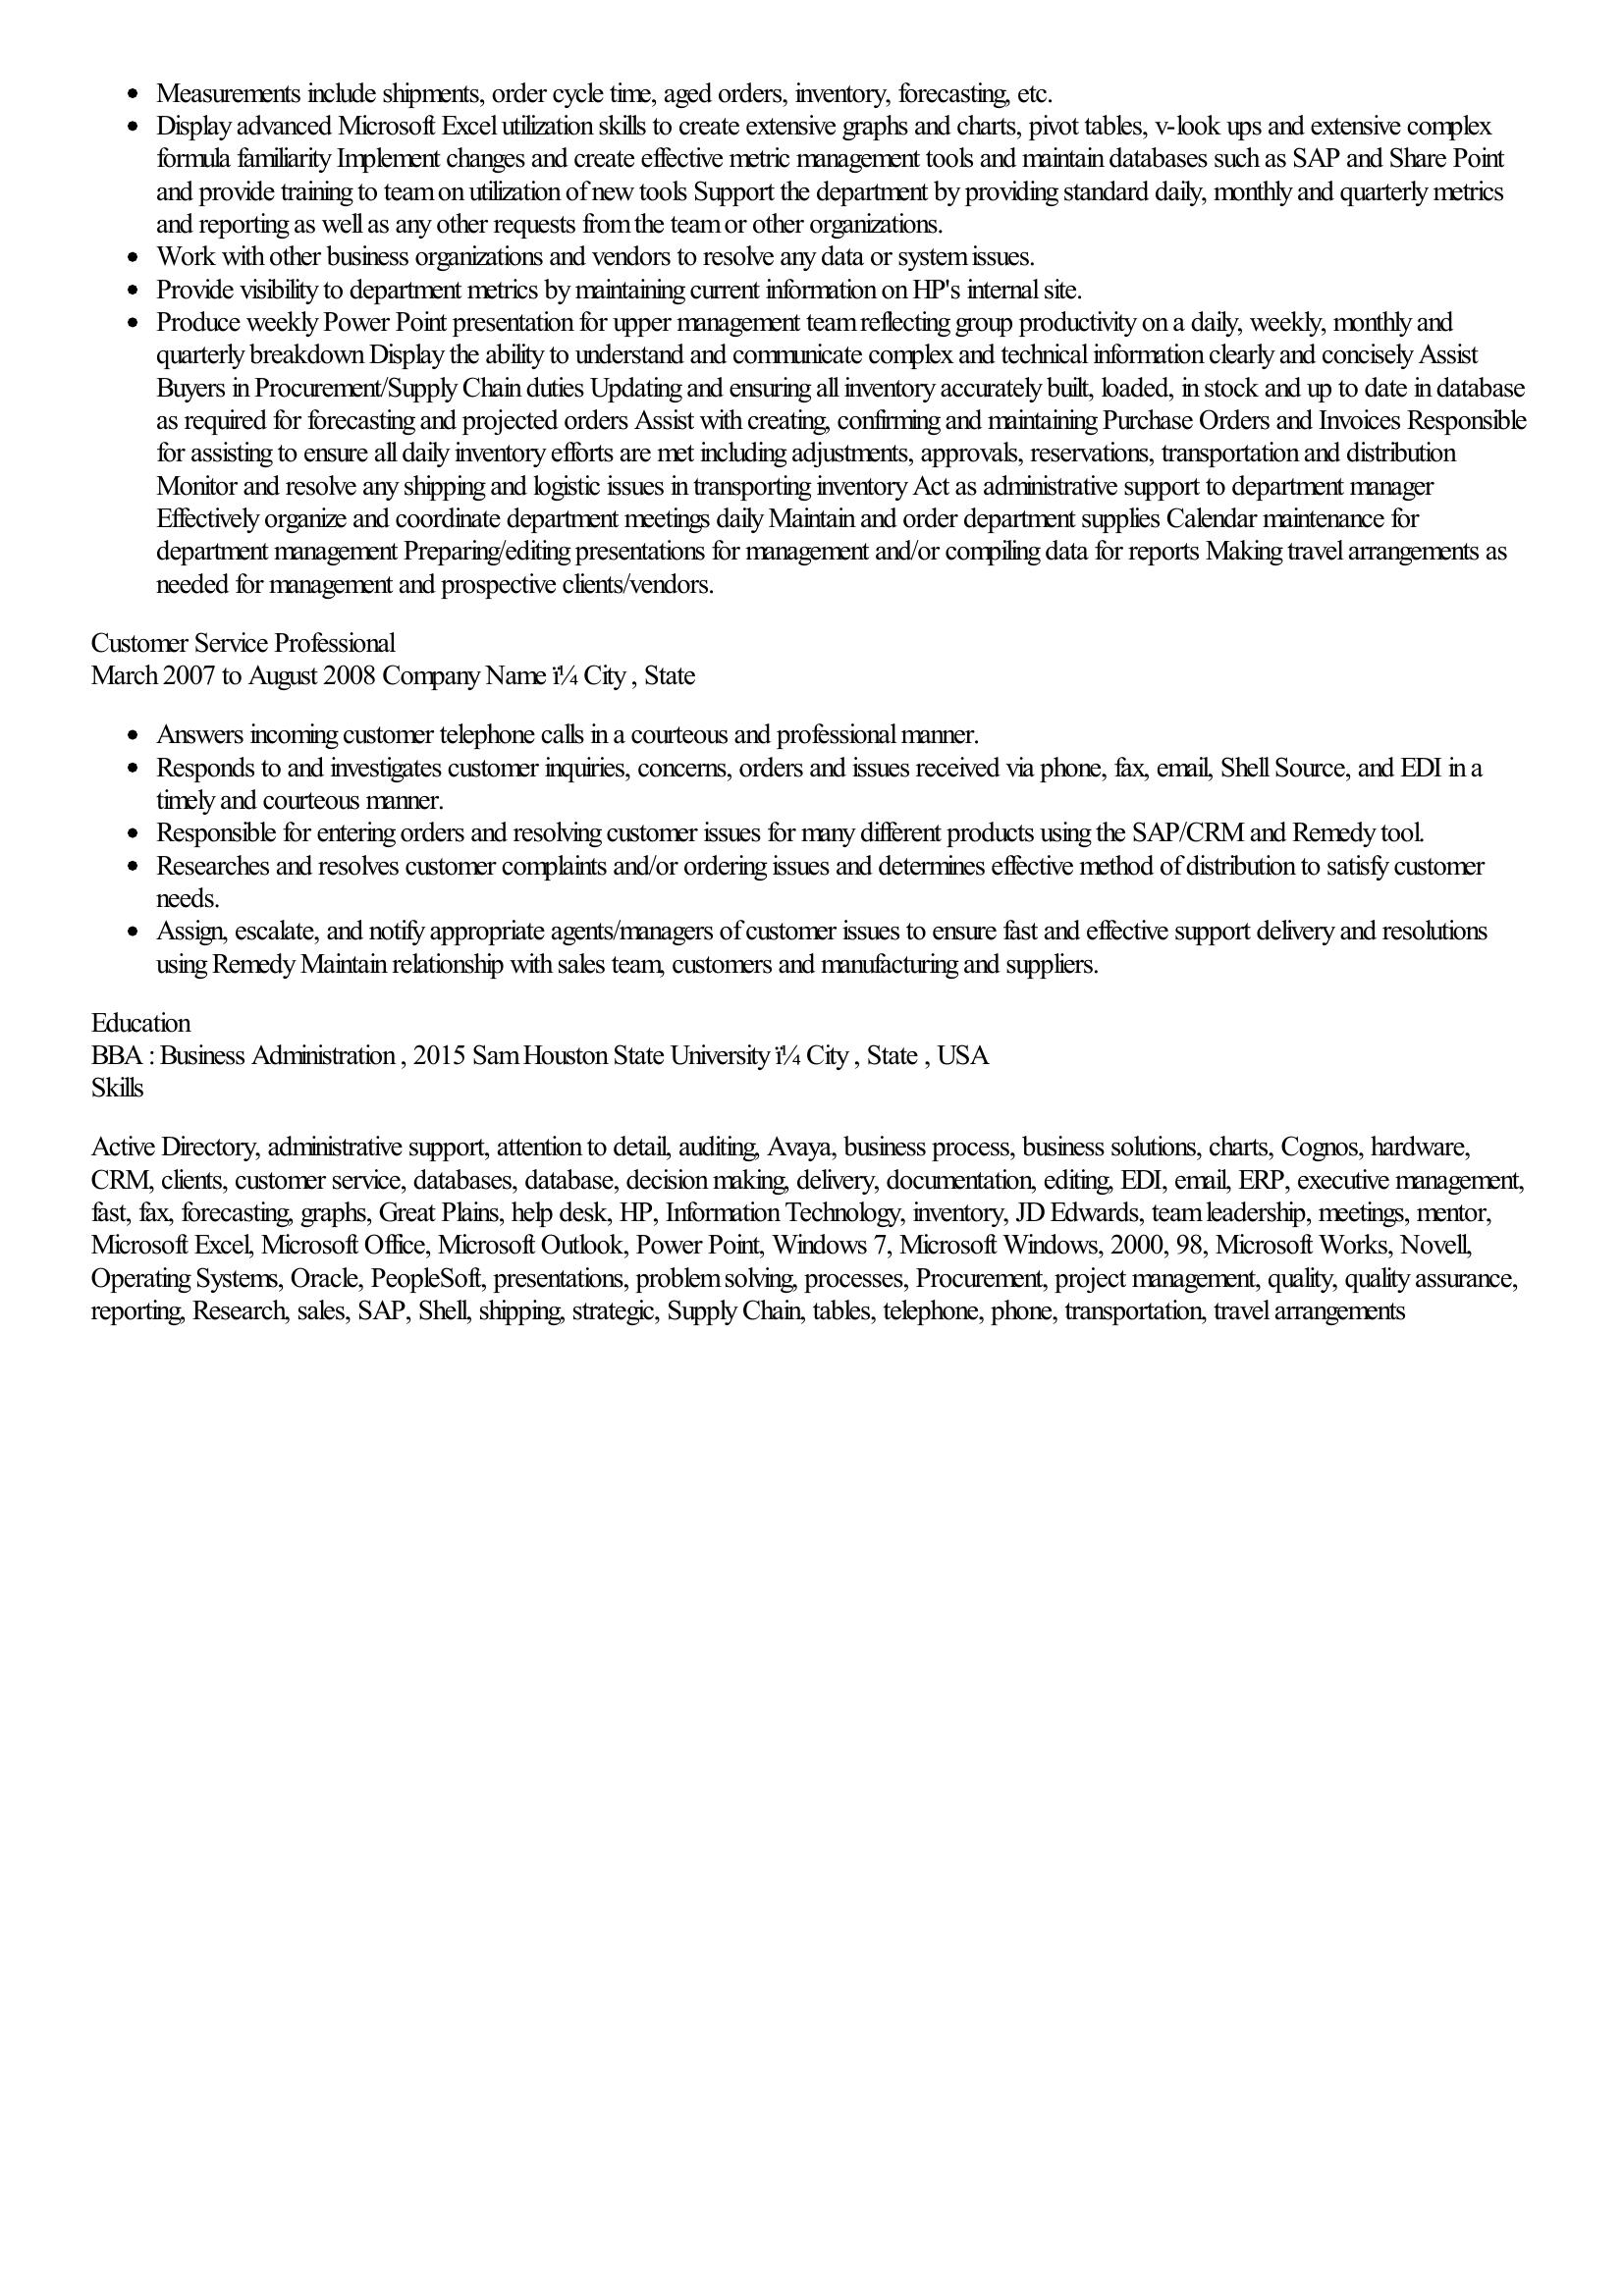

In [19]:
from IPython.display import display, Image

image_path = os.path.join("resume_image", "52618188", "page2.jpg")
display(Image(filename=image_path))

In [20]:
from PIL import Image
import pytesseract

pytesseract.image_to_string(Image.open('/content/resume_image/52618188/page2.jpg'))

"* Measurements include shipments, order cycle time, aged orders, inventory, forecasting, etc.\n\n¢ Display advanced Microsoft Excel utilization skills to create extensive graphs and charts, pivot tables, v-look ups and extensive complex\nformula familiarity Implement changes and create effective metric management tools and maintain databases such as SAP and Share Point\nand provide training to team on utilization of new tools Support the department by providing standard daily, monthly and quarterly metrics\nand reporting as well as any other requests from the team or other organizations.\n\n¢ Work with other business organizations and vendors to resolve any data or system issues.\n\n© Provide visibility to department metrics by maintaining current information on HP's internal site.\n\ne Produce weekly Power Point presentation for upper management team reflecting group productivity on a daily, weekly, monthly and\nquarterly breakdown Display the ability to understand and communicate co

In [22]:
from PIL import Image
import pytesseract
import time
import os
from google import genai # Added import
from google.colab import userdata
import json

input_folder_path = "/content/resume_image"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

os.makedirs(output_folder_path, exist_ok=True)
print(f"Output folder: {output_folder_path}")

total_images = 0
for resume_id_folder in os.listdir(input_folder_path):
    resume_id_folder_path = os.path.join(input_folder_path, resume_id_folder)
    if os.path.isdir(resume_id_folder_path):
        total_images += len([name for name in os.listdir(resume_id_folder_path) if name.endswith('.jpg')])


print(f"Total image files to process: {total_images}")

processed_count = 0
# The rest of your processing code will go here, after you select a valid model
for resume_id_folder in os.listdir(input_folder_path):
    resume_id_folder_path = os.path.join(input_folder_path, resume_id_folder)
    if os.path.isdir(resume_id_folder_path):
        for image_name in os.listdir(resume_id_folder_path):
            if image_name.endswith('.jpg') and processed_count < 10: # Add condition to limit processing to 10 images
                processed_count += 1
                image_path = os.path.join(resume_id_folder_path, image_name)
                print(f"Processing image {processed_count}/10: {image_path}") # Update print statement

                try:
                    with open(image_path,"rb") as f:
                      img = Image.open(image_path)
                    text = pytesseract.image_to_string(img)
                    output_subdir = os.path.join(output_folder_path, resume_id_folder)
                    os.makedirs(output_subdir, exist_ok=True)
                    output_path = os.path.join(output_subdir, image_name.replace(".jpg", ".txt"))
                    with open(output_path, "r") as f:
                        text=f.read()
                    print(f"Extracting information from image and text")
                    prompt=prompt+text
                    contents=[
                    img,{
                        "text":prompt
                    }
                ]
                    response=genai_client.models.generate_content(model='gemini-2.5-flash',contents=contents)
                    usage_metadata=response.usage_metadata
                    print(f"Input Token Count: {usage_metadata.prompt_token_count}")
                    print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
                    print(f"Output Token Count: {usage_metadata.candidates_token_count}")
                    print(f"Total Token Count: {usage_metadata.total_token_count}")
                    extracted_info=json.loads(response.text.replace('```json','').replace('```',''))
                    op_path=os.path.join(output_folder_path,image_name.replace(".jpg",".json"))
                    with open(op_path,"w") as f:
                      json.dump(extracted_info,f,indent=4)
                    print(f"Saved extracted info to {op_path}")
                    print('-'*50)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")




print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Output folder: /content/tesseract_output
Total image files to process: 29
Processing image 1/10: /content/resume_image/92069209/page2.jpg
Extracting information from image and text
Error processing /content/resume_image/92069209/page2.jpg: name 'prompt' is not defined
Processing image 2/10: /content/resume_image/92069209/page1.jpg
Extracting information from image and text
Error processing /content/resume_image/92069209/page1.jpg: name 'prompt' is not defined
Processing image 3/10: /content/resume_image/57002858/page2.jpg
Extracting information from image and text
Error processing /content/resume_image/57002858/page2.jpg: name 'prompt' is not defined
Processing image 4/10: /content/resume_image/57002858/page1.jpg
Extracting information from image and text
Error processing /content/resume_image/57002858/page1.jpg: name 'prompt' is not defined
Processing image 5/10: /content/resume_image/81761658/page2.jpg
Extracting information from image and text
Error processing /content/resume_image/

In [23]:
prompt = """
Extract the following information from the given resume text:
- Name
- Skills
- Experience (extract all experience entries, not just the first one)

The text has been extracted from a resume image using tesseract. The resumes do not follow a strict key-value pair structure. Use the extracted text as support for extracting information.

Always give your response in the following JSON format:
{
    "name": "FULL_NAME",
    "skills": ["SKILL1", "SKILL2", ...],
    "experience": [
        {
            "job_title": "JOB_TITLE",
            "company": "COMPANY_NAME",
            "duration": "DURATION",
            "description": "JOB_DESCRIPTION"
        },
        ...
    ]
}

If you believe the extraction is incorrect somewhere, you may correct it yourself and provide corrected information.
Respond with the extracted information only in the specified JSON format.
Here is the text:


"""

In [24]:
from google import genai
from google.colab import userdata
from PIL import Image
import json
import time

In [25]:
genai_client = genai.Client(api_key=userdata.get('GOOGLE_API_KEY'))

In [26]:
from PIL import Image
import pytesseract
import time
import os
from google import genai # Added import
from google.colab import userdata
import json

input_folder_path = "/content/resume_image"
output_folder_path = "/content/tesseract_output"
start_time = time.time()

os.makedirs(output_folder_path, exist_ok=True)
print(f"Output folder: {output_folder_path}")

total_images = 0
for resume_id_folder in os.listdir(input_folder_path):
    resume_id_folder_path = os.path.join(input_folder_path, resume_id_folder)
    if os.path.isdir(resume_id_folder_path):
        total_images += len([name for name in os.listdir(resume_id_folder_path) if name.endswith('.jpg')])


print(f"Total image files to process: {total_images}")

processed_count = 0
# The rest of your processing code will go here, after you select a valid model
for resume_id_folder in os.listdir(input_folder_path):
    resume_id_folder_path = os.path.join(input_folder_path, resume_id_folder)
    if os.path.isdir(resume_id_folder_path):
        for image_name in os.listdir(resume_id_folder_path):
            if image_name.endswith('.jpg') and processed_count < 10: # Add condition to limit processing to 10 images
                processed_count += 1
                image_path = os.path.join(resume_id_folder_path, image_name)
                print(f"Processing image {processed_count}/10: {image_path}") # Update print statement

                try:
                    with open(image_path,"rb") as f:
                      img = Image.open(image_path)
                    text = pytesseract.image_to_string(img)
                    output_subdir = os.path.join(output_folder_path, resume_id_folder)
                    os.makedirs(output_subdir, exist_ok=True)
                    output_path = os.path.join(output_subdir, image_name.replace(".jpg", ".txt"))
                    with open(output_path, "r") as f:
                        text=f.read()
                    print(f"Extracting information from image and text")
                    prompt=prompt+text
                    contents=[
                    img,{
                        "text":prompt
                    }
                ]
                    response=genai_client.models.generate_content(model='gemini-2.5-flash',contents=contents)
                    usage_metadata=response.usage_metadata
                    print(f"Input Token Count: {usage_metadata.prompt_token_count}")
                    print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}")
                    print(f"Output Token Count: {usage_metadata.candidates_token_count}")
                    print(f"Total Token Count: {usage_metadata.total_token_count}")
                    extracted_info=json.loads(response.text.replace('```json','').replace('```',''))
                    op_path=os.path.join(output_folder_path,image_name.replace(".jpg",".json"))
                    with open(op_path,"w") as f:
                      json.dump(extracted_info,f,indent=4)
                    print(f"Saved extracted info to {op_path}")
                    print('-'*50)
                except Exception as e:
                    print(f"Error processing {image_path}: {e}")




print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Output folder: /content/tesseract_output
Total image files to process: 29
Processing image 1/10: /content/resume_image/92069209/page2.jpg
Extracting information from image and text
Input Token Count: 494
Thoughts Token Count: 119
Output Token Count: 90
Total Token Count: 703
Saved extracted info to /content/tesseract_output/page2.json
--------------------------------------------------
Processing image 2/10: /content/resume_image/92069209/page1.jpg
Extracting information from image and text
Input Token Count: 1557
Thoughts Token Count: 1506
Output Token Count: 1037
Total Token Count: 4100
Saved extracted info to /content/tesseract_output/page1.json
--------------------------------------------------
Processing image 3/10: /content/resume_image/57002858/page2.jpg
Extracting information from image and text
Input Token Count: 1814
Thoughts Token Count: 5872
Output Token Count: 1249
Total Token Count: 8935
Saved extracted info to /content/tesseract_output/page2.json
-------------------------